In [2]:
import pandas as pd

In [3]:
data = pd.read_csv("coba_no_ir.csv")
data.head()

username                                               text  \
0       Mulud hidayat  Tukang parkir indomart depan polsek ciputat, k...   
1              Ughea.  Percaya aja sm tukang parkir yg sering mengara...   
2          raka ahmad                     tukang parkir terkeren sedunia   
3  JuliastutiÃ°ÂÂÂ¼        di sedekahin ke tukang parkir annur ae udah   
4       Mulud hidayat  Tukang parkir indomart depan polsek ciputat, k...   

   label  
0      2  
1      2  
2      2  
3      2  
4      2

# Cleansing
## Proses Cleansing berisi :
1. casefolding
2. pembersihan link
3. pembersihan karakter non huruf

In [4]:
import re
import string
from tqdm.notebook import tqdm

In [5]:
output_text = []
def clean_text(list_of_text):
  for text in tqdm(list_of_text):    
    text = text.translate(str.maketrans("","", string.punctuation)).lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"pic\S+", "", text)
    text = re.sub(r"www\S+", "", text)
    text = re.sub(r'[^a-zA-Z0-9]', ' ', text)
    output_text.append(text)
  return output_text

In [6]:
data['text'] = clean_text(list(data['text']))
data.to_csv("data_cleansing.csv", index=False)

# Slangword Converter

In [7]:
data_cleansing = pd.read_csv("data_cleansing.csv")

In [8]:
data_cleansing.head()

username                                               text  \
0       Mulud hidayat  tukang parkir indomart depan polsek ciputat ke...   
1              Ughea.  percaya aja sm tukang parkir yg sering mengara...   
2          raka ahmad                     tukang parkir terkeren sedunia   
3  JuliastutiÃ°ÂÂÂ¼        di sedekahin ke tukang parkir annur ae udah   
4       Mulud hidayat  tukang parkir indomart depan polsek ciputat ke...   

   label  
0      2  
1      2  
2      2  
3      2  
4      2

In [9]:
slangword = pd.read_csv("Slangword-indonesian.csv")

In [10]:
import nltk

In [11]:
def slang(text):
    text = str(text).lower()
    text = nltk.word_tokenize(text)
    ul = 0
    for a in slangword['slang']:
        w = 0
        for kt in text:
            if kt ==a:
                text[w] = slangword['formal'][ul]
            w = w+1
        ul=ul+1
    kal = ""
    for kl in text:
        kal = kal + " " + kl
    text = kal
    return kal

In [12]:
data_cleansing['text'] = data_cleansing['text'].apply(lambda text : slang(text))

In [13]:
data_cleansing.to_csv("data_noslang.csv", index=False)

# Stopword
### Kata yang terdapat di stopword berupa

In [14]:
data_noslang = pd.read_csv("data_noslang.csv")

In [15]:
data_noslang.head()

username                                               text  \
0       Mulud hidayat   tukang parkir indomart depan polsek ciputat k...   
1              Ughea.   percaya saja sama tukang parkir yang sering m...   
2          raka ahmad                     tukang parkir terkeren sedunia   
3  JuliastutiÃ°ÂÂÂ¼     di sedekahin ke tukang parkir annur saja sudah   
4       Mulud hidayat   tukang parkir indomart depan polsek ciputat k...   

   label  
0      2  
1      2  
2      2  
3      2  
4      2

In [16]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

In [17]:
#Create STOP Word Remover
factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()
output_text = []
def stop(list_of_text):
  for text in tqdm(list_of_text): 
    text = stopword.remove(text)
    output_text.append(text)
  return output_text

In [18]:
data_noslang['text'] = stop(list(data_noslang['text']))
data_noslang.to_csv("data_stop.csv",index=False)

In [19]:
data_stop = pd.read_csv("data_stop.csv")

In [20]:
data_stop.head()

username                                               text  \
0       Mulud hidayat   tukang parkir indomart depan polsek ciputat k...   
1              Ughea.   percaya sama tukang parkir sering mengarahkan...   
2          raka ahmad                     tukang parkir terkeren sedunia   
3  JuliastutiÃ°ÂÂÂ¼                sedekahin tukang parkir annur sudah   
4       Mulud hidayat   tukang parkir indomart depan polsek ciputat k...   

   label  
0      2  
1      2  
2      2  
3      2  
4      2

# Stemming

In [21]:
# create stemmer
stem_factory = StemmerFactory()
stemmer = stem_factory.create_stemmer()
output_text = []
def stem_data(list_of_text):
  for text in tqdm(list_of_text): 
    text = stemmer.stem(text)
    output_text.append(text)
  return output_text

In [ ]:
data_stop['text'] = stem_data(list(data_stop['text']))

In [55]:
data_stop.to_csv("data_clean.csv",index=False)

In [56]:
data_clean = pd.read_csv("data_clean.csv")

In [57]:
data_clean.head()

username                                               text  \
0         Salman Sudiro  semalem beli nasgor parkir depan indomart pas ...   
1  RIAN PIJAT CIBARUSAH   tukang parkir sama tukang bakso tanya tanya grup   
2           pameranbuku  mbayar lik sewu po limang ewu wehke tukang par...   
3    JuliastutiÃ°ÂÂÂ¼                      sedekahin tukang parkir annur   
4           Aim Twister  pacar sama tukang parkir indak lama terus teru...   

   label  
0      0  
1      0  
2      0  
3      0  
4      0

In [58]:
label_positif = data_clean[data_clean['label'] == 2]

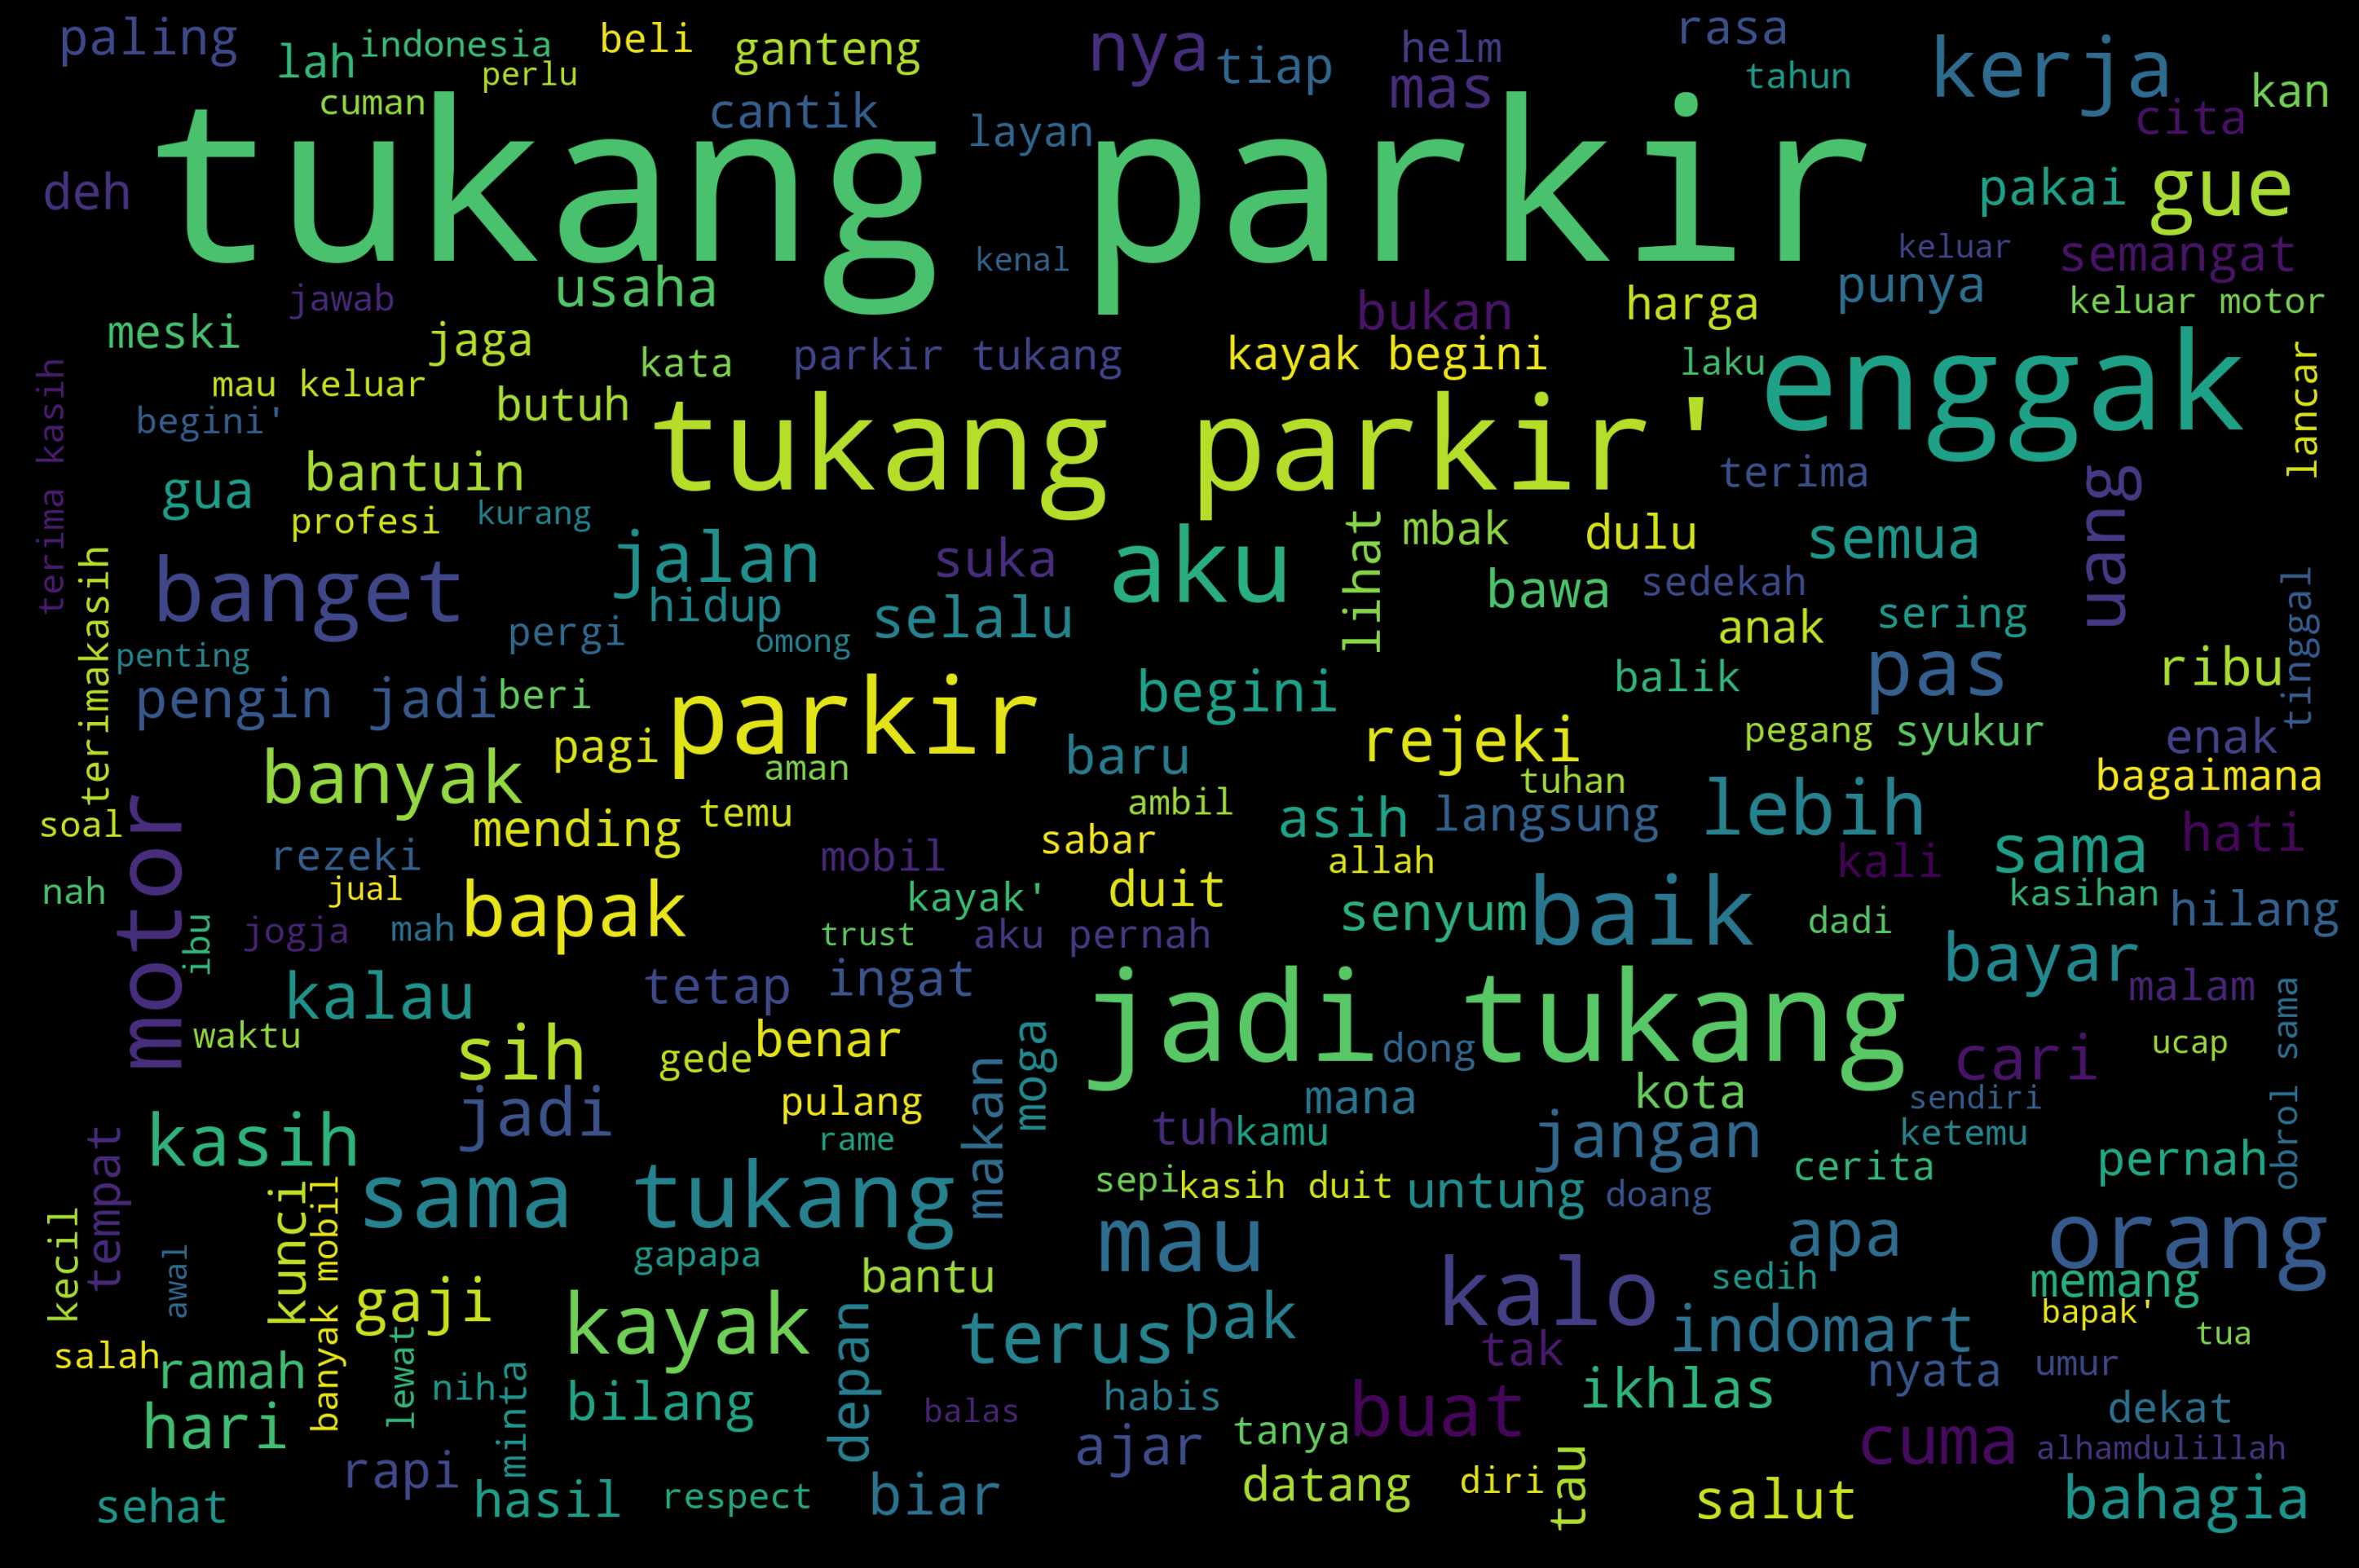

In [59]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
text = label_positif.text.values
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [60]:
label_negatif = data_clean[data_clean['label'] == 1]

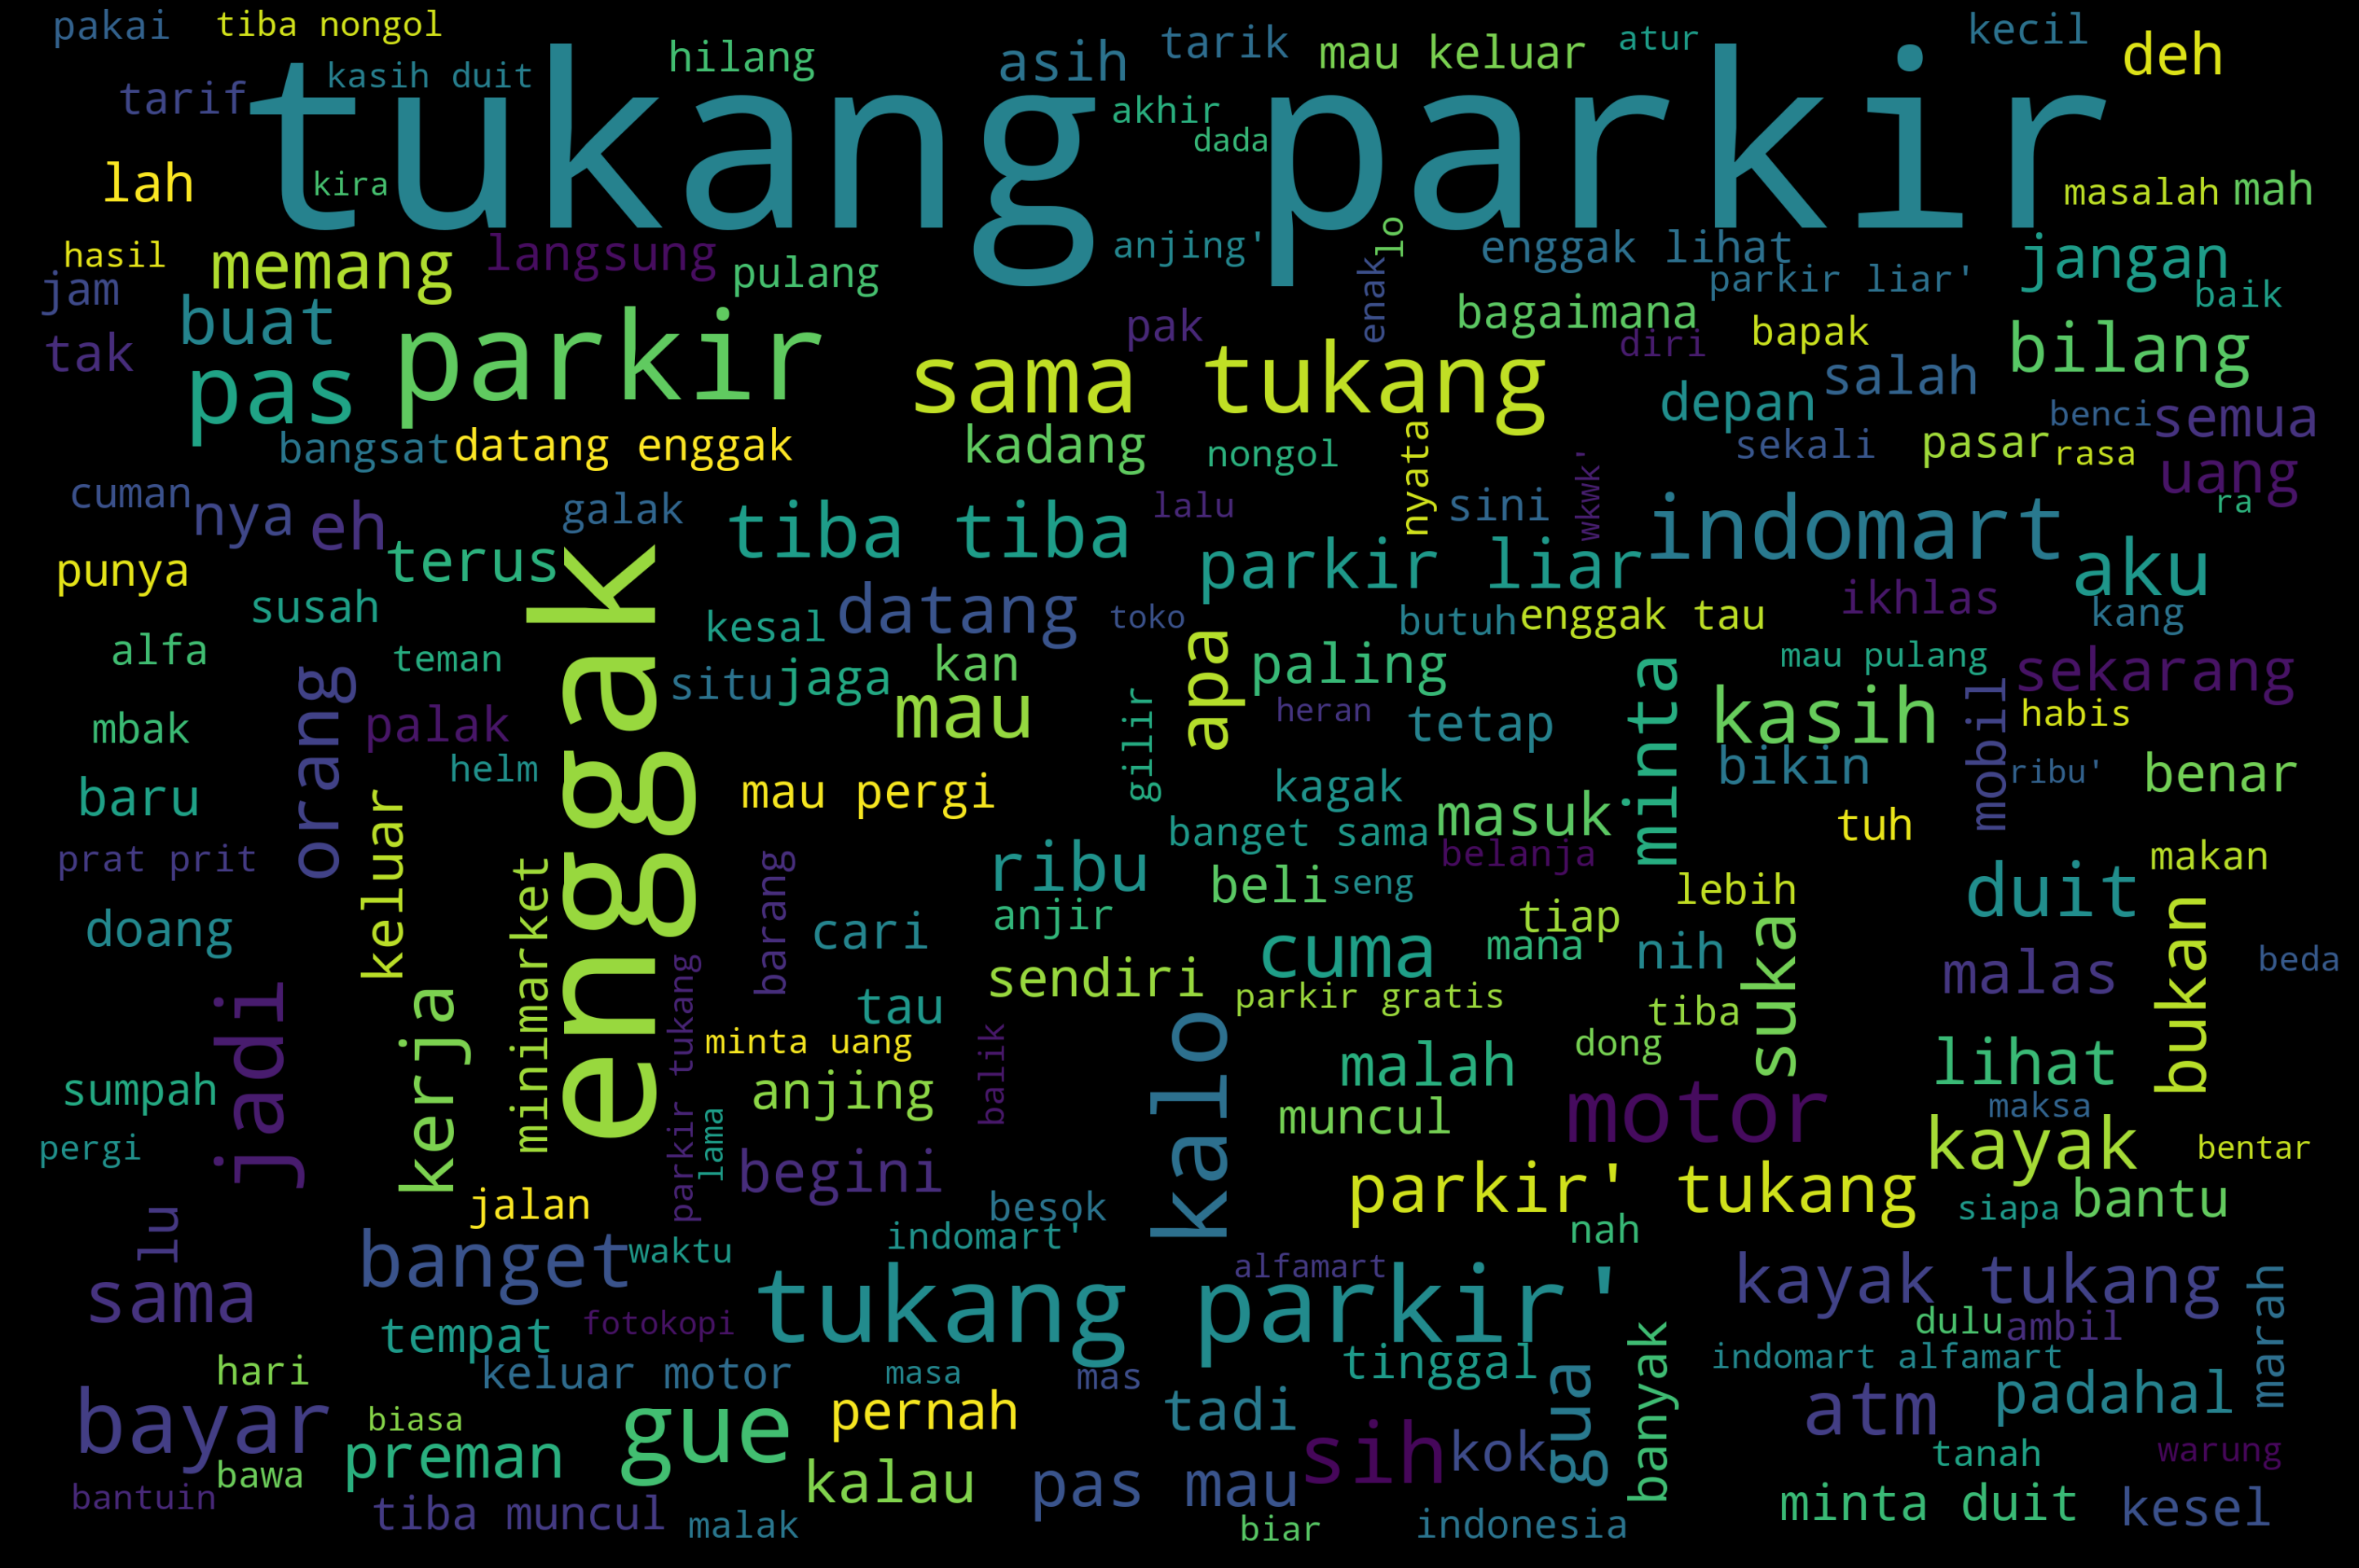

In [61]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
text = label_negatif.text.values
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [62]:
label_irrelevant = data_clean[data_clean['label'] == 0]

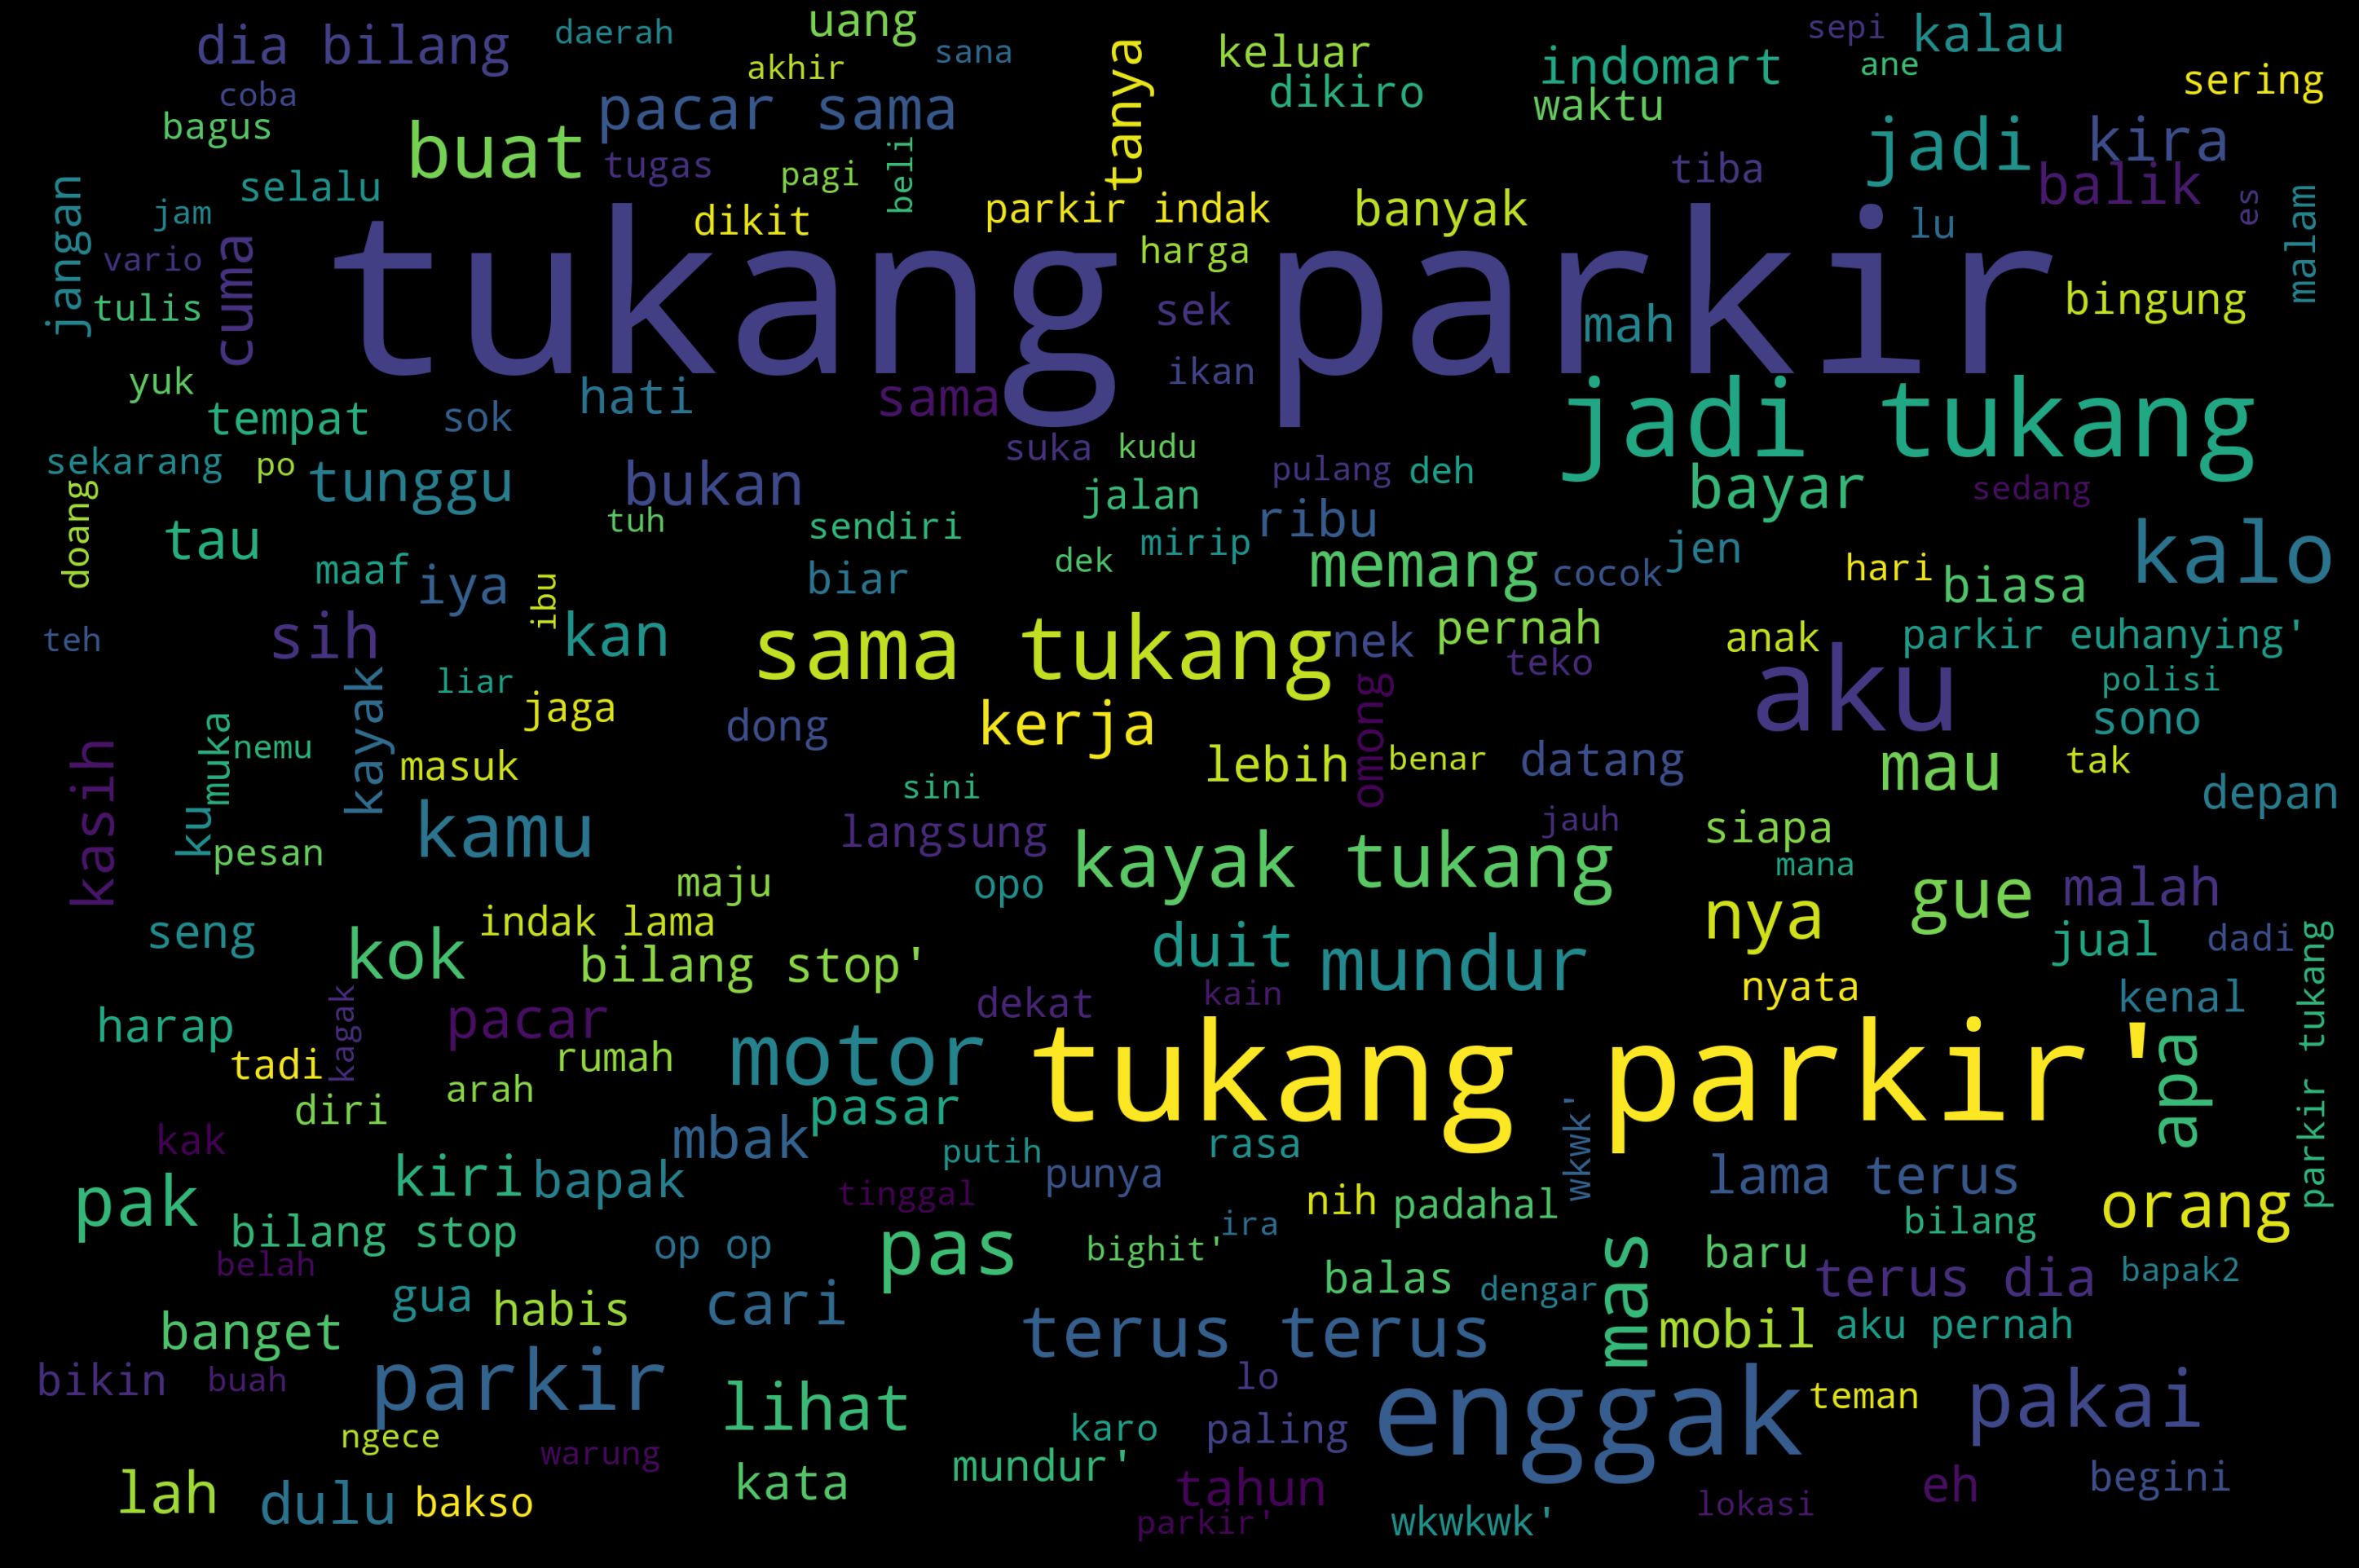

In [63]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
text = label_irrelevant.text.values
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()